In [1]:
!pip install -q -U watermark

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression

In [3]:
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

sklearn   : 1.3.0
matplotlib: 3.7.2
numpy     : 1.26.0
seaborn   : 0.12.2
pandas    : 2.0.3



In [4]:
df = pd.read_excel('G:/Meu Drive/Data Science/_Formação Analista de Dados DSA/Cursos de Aperfeiçoamento Profissional/07. E-Gov Analytics/dados/dataset.xlsx')

In [5]:
df.shape

(17, 16)

In [6]:
df.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,pib_cor_us$,despesa_nac_bruta_%pib,pib_moeda_local
0,2003,20.85074,25.437891,24.98009,5.169123,NaN,NaN,2.741964e+09,2.709600,0.180864,51.824235,1.488423,2.932476,1.490452e+10,111.732648,1131782000000
1,2004,23.40954,27.526983,26.66815,5.344949,NaN,NaN,2.882726e+09,2.720796,2.283178,55.517666,1.416008,5.104300,1.609534e+10,110.347249,1274329000000
2,2005,NaN,30.960957,27.46934,5.314364,NaN,NaN,2.663224e+09,2.739229,3.045012,58.237838,1.482691,5.906666,1.873790e+10,110.429285,1415725000000
3,2006,21.67777,40.938290,25.08140,5.873449,NaN,NaN,2.764089e+09,2.757907,3.576204,71.941278,1.458456,6.472494,2.582552e+10,109.212364,1862041000000
4,2007,NaN,50.321873,NaN,5.997067,NaN,NaN,2.968119e+09,2.768560,3.933078,77.789734,1.556385,6.850730,3.195820e+10,109.941251,2151349000000


In [7]:
df.isna().sum()

ano_coleta                       0
despesas_educ_percent            9
despesas_saude_per_capita        2
despesas_educ_total              4
despesas_saude_%pib              2
receita_trib_%pib               12
receita_excl_doa_%pib           12
ibrd_e_ida                       1
pop_cresc_anual%                 0
pib_cresc_per_capita_%pib        0
pib_deflator                     0
domestic_saude_despesas_%pib     2
pib_cresc_anual%                 0
pib_cor_us$                      0
despesa_nac_bruta_%pib           0
pib_moeda_local                  0
dtype: int64

In [8]:
df.isnull().sum()

ano_coleta                       0
despesas_educ_percent            9
despesas_saude_per_capita        2
despesas_educ_total              4
despesas_saude_%pib              2
receita_trib_%pib               12
receita_excl_doa_%pib           12
ibrd_e_ida                       1
pop_cresc_anual%                 0
pib_cresc_per_capita_%pib        0
pib_deflator                     0
domestic_saude_despesas_%pib     2
pib_cresc_anual%                 0
pib_cor_us$                      0
despesa_nac_bruta_%pib           0
pib_moeda_local                  0
dtype: int64

In [9]:
df.dtypes

ano_coleta                        int64
despesas_educ_percent           float64
despesas_saude_per_capita       float64
despesas_educ_total             float64
despesas_saude_%pib             float64
receita_trib_%pib               float64
receita_excl_doa_%pib           float64
ibrd_e_ida                      float64
pop_cresc_anual%                float64
pib_cresc_per_capita_%pib       float64
pib_deflator                    float64
domestic_saude_despesas_%pib    float64
pib_cresc_anual%                float64
pib_cor_us$                     float64
despesa_nac_bruta_%pib          float64
pib_moeda_local                   int64
dtype: object

In [10]:
df.describe()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,pib_cor_us$,despesa_nac_bruta_%pib,pib_moeda_local
count,17.000000,8.000000,15.000000,13.000000,15.000000,5.000000,5.000000,1.600000e+01,17.000000,17.000000,17.000000,15.000000,17.000000,1.700000e+01,17.000000,1.700000e+01
mean,2011.000000,34.776599,55.265036,20.844645,5.555868,16.008023,21.028661,3.667159e+09,2.606996,2.539702,117.186747,1.754343,5.247425,4.851720e+10,112.318030,4.387753e+12
std,5.049752,10.632141,17.077696,3.828826,0.412144,0.677579,0.944677,9.532678e+08,0.172462,1.798253,46.934509,0.249802,1.809246,2.477595e+10,2.112360,2.776122e+12
min,2003.000000,20.850740,25.437891,16.664660,4.802543,15.085142,19.620423,2.663224e+09,2.271902,-2.503373,51.824235,1.416008,0.232283,1.490452e+10,109.212364,1.131782e+12
25%,2007.000000,22.976598,45.630081,17.708700,5.266875,15.637825,20.616187,2.946771e+09,2.491937,2.283178,77.789734,1.522404,4.805697,3.195820e+10,110.429285,2.151349e+12
50%,2011.000000,41.763410,57.387424,19.252830,5.519421,16.183533,21.199592,3.313021e+09,2.693733,3.045012,113.111372,1.771546,5.718507,4.195343e+10,112.164729,3.725918e+12
75%,2015.000000,42.682555,69.282478,24.980090,5.935258,16.256635,21.738908,4.244785e+09,2.739229,3.346252,154.710423,1.950641,6.108264,6.400775e+10,114.066709,6.284185e+12
max,2019.000000,43.124180,76.610321,27.469340,6.116753,16.876979,21.968194,5.801797e+09,2.768560,5.494077,192.904792,2.148430,8.405699,9.550309e+10,116.218812,9.740360e+12


In [11]:
df['receita_trib_%pib'].fillna(method='bfill', inplace=True)
df['receita_excl_doa_%pib'].fillna(method='bfill', inplace=True)
df = df.interpolate()

In [12]:
df.isna().sum()

ano_coleta                      0
despesas_educ_percent           0
despesas_saude_per_capita       0
despesas_educ_total             0
despesas_saude_%pib             0
receita_trib_%pib               0
receita_excl_doa_%pib           0
ibrd_e_ida                      0
pop_cresc_anual%                0
pib_cresc_per_capita_%pib       0
pib_deflator                    0
domestic_saude_despesas_%pib    0
pib_cresc_anual%                0
pib_cor_us$                     0
despesa_nac_bruta_%pib          0
pib_moeda_local                 0
dtype: int64

In [13]:
df.shape

(17, 16)

In [14]:
df = df.drop(columns='pib_cor_us$')

In [15]:
df.shape

(17, 15)

In [16]:
df = df.round(4)

In [17]:
df.head(20)

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,despesa_nac_bruta_%pib,pib_moeda_local
0,2003,20.8507,25.4379,24.9801,5.1691,16.8770,21.7389,2.741964e+09,2.7096,0.1809,51.8242,1.4884,2.9325,111.7326,1131782000000
1,2004,23.4095,27.5270,26.6682,5.3449,16.8770,21.7389,2.882726e+09,2.7208,2.2832,55.5177,1.4160,5.1043,110.3472,1274329000000
2,2005,22.5437,30.9610,27.4693,5.3144,16.8770,21.7389,2.663224e+09,2.7392,3.0450,58.2378,1.4827,5.9067,110.4293,1415725000000
3,2006,21.6778,40.9383,25.0814,5.8734,16.8770,21.7389,2.764089e+09,2.7579,3.5762,71.9413,1.4585,6.4725,109.2124,1862041000000
4,2007,25.8529,50.3219,23.9500,5.9971,16.8770,21.7389,2.968119e+09,2.7686,3.9331,77.7897,1.5564,6.8507,109.9413,2151349000000
5,2008,30.0280,55.4711,22.8187,6.0499,16.8770,21.7389,3.050475e+09,2.7673,-2.5034,89.5758,1.6380,0.2323,110.6143,2483058000000
6,2009,34.2031,55.4607,21.6873,6.0278,16.8770,21.7389,3.156096e+09,2.7508,0.5039,100.0000,1.6806,3.3069,110.7984,2863688000000
7,2010,38.3781,59.1698,20.5560,6.1168,16.8770,21.7389,3.237614e+09,2.7226,5.4941,102.0917,1.7715,8.4057,112.1647,3169335000000
8,2011,42.5532,57.3874,19.2528,5.8117,16.8770,21.7389,3.388428e+09,2.6937,3.2881,113.1114,1.7938,6.1083,114.5232,3725918000000
9,2012,41.7632,64.8394,19.9239,5.6137,16.8770,21.7389,3.585785e+09,2.6627,1.8157,123.7210,1.8193,4.5632,114.0667,4261370003300


In [18]:
df.to_csv('G:/Meu Drive/Data Science/_Formação Analista de Dados DSA/Cursos de Aperfeiçoamento Profissional/07. E-Gov Analytics/dados/dataset_tratado.csv', index=False)

# Análise de Dados

In [21]:
df_tratado = pd.read_csv('G:/Meu Drive/Data Science/_Formação Analista de Dados DSA/Cursos de Aperfeiçoamento Profissional/07. E-Gov Analytics/dados/dataset_tratado.csv')    

In [22]:
df_tratado.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,despesa_nac_bruta_%pib,pib_moeda_local
0,2003,20.8507,25.4379,24.9801,5.1691,16.877,21.7389,2.741964e+09,2.7096,0.1809,51.8242,1.4884,2.9325,111.7326,1131782000000
1,2004,23.4095,27.5270,26.6682,5.3449,16.877,21.7389,2.882726e+09,2.7208,2.2832,55.5177,1.4160,5.1043,110.3472,1274329000000
2,2005,22.5437,30.9610,27.4693,5.3144,16.877,21.7389,2.663224e+09,2.7392,3.0450,58.2378,1.4827,5.9067,110.4293,1415725000000
3,2006,21.6778,40.9383,25.0814,5.8734,16.877,21.7389,2.764089e+09,2.7579,3.5762,71.9413,1.4585,6.4725,109.2124,1862041000000
4,2007,25.8529,50.3219,23.9500,5.9971,16.877,21.7389,2.968119e+09,2.7686,3.9331,77.7897,1.5564,6.8507,109.9413,2151349000000


# 1. Em que ano o país teve um alto crescimento do PIB per capita?

In [23]:
df_tratado.head(20)

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,despesa_nac_bruta_%pib,pib_moeda_local
0,2003,20.8507,25.4379,24.9801,5.1691,16.8770,21.7389,2.741964e+09,2.7096,0.1809,51.8242,1.4884,2.9325,111.7326,1131782000000
1,2004,23.4095,27.5270,26.6682,5.3449,16.8770,21.7389,2.882726e+09,2.7208,2.2832,55.5177,1.4160,5.1043,110.3472,1274329000000
2,2005,22.5437,30.9610,27.4693,5.3144,16.8770,21.7389,2.663224e+09,2.7392,3.0450,58.2378,1.4827,5.9067,110.4293,1415725000000
3,2006,21.6778,40.9383,25.0814,5.8734,16.8770,21.7389,2.764089e+09,2.7579,3.5762,71.9413,1.4585,6.4725,109.2124,1862041000000
4,2007,25.8529,50.3219,23.9500,5.9971,16.8770,21.7389,2.968119e+09,2.7686,3.9331,77.7897,1.5564,6.8507,109.9413,2151349000000
5,2008,30.0280,55.4711,22.8187,6.0499,16.8770,21.7389,3.050475e+09,2.7673,-2.5034,89.5758,1.6380,0.2323,110.6143,2483058000000
6,2009,34.2031,55.4607,21.6873,6.0278,16.8770,21.7389,3.156096e+09,2.7508,0.5039,100.0000,1.6806,3.3069,110.7984,2863688000000
7,2010,38.3781,59.1698,20.5560,6.1168,16.8770,21.7389,3.237614e+09,2.7226,5.4941,102.0917,1.7715,8.4057,112.1647,3169335000000
8,2011,42.5532,57.3874,19.2528,5.8117,16.8770,21.7389,3.388428e+09,2.6937,3.2881,113.1114,1.7938,6.1083,114.5232,3725918000000
9,2012,41.7632,64.8394,19.9239,5.6137,16.8770,21.7389,3.585785e+09,2.6627,1.8157,123.7210,1.8193,4.5632,114.0667,4261370003300


In [24]:
df_tratado['pib_cresc_per_capita_%pib'].max()

5.4941

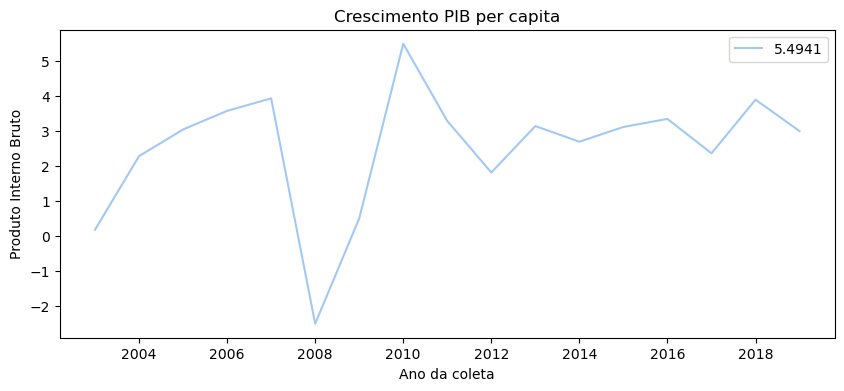

In [40]:
fig, ax = plt.subplots(figsize=(10,4))
sns.lineplot(df_tratado, x='ano_coleta', y='pib_cresc_per_capita_%pib', 
             palette='pastel', color='blue', hue=df_tratado['pib_cresc_per_capita_%pib'].max())
plt.title('Crescimento PIB per capita')
plt.xlabel('Ano da coleta')
plt.ylabel('Produto Interno Bruto')
plt.show()

### Resposta: 2010 foi o ano que apresentou o maior crescimento do PIB per capita.

# 2. Qual ano teve as maiores despesas com saúde?

In [41]:
df_tratado.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,despesa_nac_bruta_%pib,pib_moeda_local
0,2003,20.8507,25.4379,24.9801,5.1691,16.877,21.7389,2.741964e+09,2.7096,0.1809,51.8242,1.4884,2.9325,111.7326,1131782000000
1,2004,23.4095,27.5270,26.6682,5.3449,16.877,21.7389,2.882726e+09,2.7208,2.2832,55.5177,1.4160,5.1043,110.3472,1274329000000
2,2005,22.5437,30.9610,27.4693,5.3144,16.877,21.7389,2.663224e+09,2.7392,3.0450,58.2378,1.4827,5.9067,110.4293,1415725000000
3,2006,21.6778,40.9383,25.0814,5.8734,16.877,21.7389,2.764089e+09,2.7579,3.5762,71.9413,1.4585,6.4725,109.2124,1862041000000
4,2007,25.8529,50.3219,23.9500,5.9971,16.877,21.7389,2.968119e+09,2.7686,3.9331,77.7897,1.5564,6.8507,109.9413,2151349000000


In [62]:
df_saude = df_tratado[['ano_coleta', 'despesas_saude_per_capita']]
df_saude.groupby(['ano_coleta']).sum(['despesas_saude_per_capita']).sort_values(by='despesas_saude_per_capita', ascending=False)

,despesas_saude_per_capita
ano_coleta,
2019,76.6103
2018,76.6103
2017,76.6103
2016,73.3969
2014,72.8889
2015,70.7257
2013,67.8393
2012,64.8394
2010,59.1698


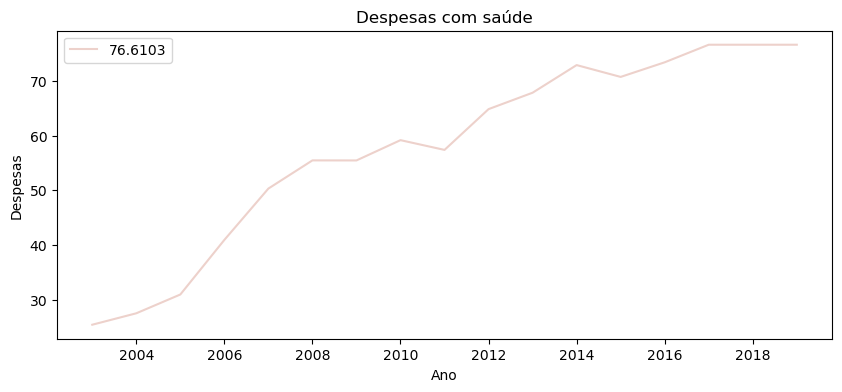

In [57]:
fig, ax = plt.subplots(figsize=(10,4))
sns.lineplot(df_tratado, x='ano_coleta', y='despesas_saude_per_capita', color='green', 
             hue=df_tratado['despesas_saude_per_capita'].max())
plt.title('Despesas com saúde')
plt.xlabel('Ano')
plt.ylabel('Despesas')
#plt.legend()
plt.show()

C:\Users\celio\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


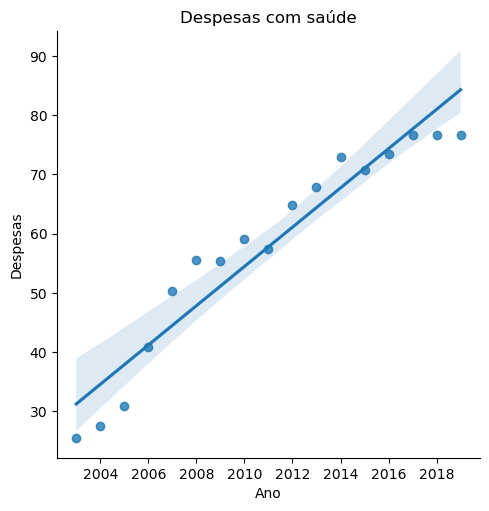

In [69]:
#fig, ax = plt.subplots(figsize=(10,4))
sns.lmplot(df_tratado, x='ano_coleta', y='despesas_saude_per_capita')
plt.title('Despesas com saúde')
plt.xlabel('Ano')
plt.ylabel('Despesas')
#plt.legend()
plt.show()

### Resposta: Dada a interpolação por causa dos dados ausentes, 2017, 2018 e 2019 são os anos que possuem o maior volume de despesas com saúde.

In [70]:
df_tratado.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,despesa_nac_bruta_%pib,pib_moeda_local
0,2003,20.8507,25.4379,24.9801,5.1691,16.877,21.7389,2.741964e+09,2.7096,0.1809,51.8242,1.4884,2.9325,111.7326,1131782000000
1,2004,23.4095,27.5270,26.6682,5.3449,16.877,21.7389,2.882726e+09,2.7208,2.2832,55.5177,1.4160,5.1043,110.3472,1274329000000
2,2005,22.5437,30.9610,27.4693,5.3144,16.877,21.7389,2.663224e+09,2.7392,3.0450,58.2378,1.4827,5.9067,110.4293,1415725000000
3,2006,21.6778,40.9383,25.0814,5.8734,16.877,21.7389,2.764089e+09,2.7579,3.5762,71.9413,1.4585,6.4725,109.2124,1862041000000
4,2007,25.8529,50.3219,23.9500,5.9971,16.877,21.7389,2.968119e+09,2.7686,3.9331,77.7897,1.5564,6.8507,109.9413,2151349000000


In [94]:
df_tratado['gasto_saude_BI'] = (df_tratado['pib_moeda_local'] * (df_tratado['despesa_nac_bruta_%pib'] / 100)) / 1000000000
df_tratado = df_tratado.drop(columns='gasto_saude')

In [95]:
df_tratado.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,despesa_nac_bruta_%pib,pib_moeda_local,gasto_saude_BI
0,2003,20.8507,25.4379,24.9801,5.1691,16.877,21.7389,2.741964e+09,2.7096,0.1809,51.8242,1.4884,2.9325,111.7326,1131782000000,1264.569455
1,2004,23.4095,27.5270,26.6682,5.3449,16.877,21.7389,2.882726e+09,2.7208,2.2832,55.5177,1.4160,5.1043,110.3472,1274329000000,1406.186370
2,2005,22.5437,30.9610,27.4693,5.3144,16.877,21.7389,2.663224e+09,2.7392,3.0450,58.2378,1.4827,5.9067,110.4293,1415725000000,1563.375207
3,2006,21.6778,40.9383,25.0814,5.8734,16.877,21.7389,2.764089e+09,2.7579,3.5762,71.9413,1.4585,6.4725,109.2124,1862041000000,2033.579665
4,2007,25.8529,50.3219,23.9500,5.9971,16.877,21.7389,2.968119e+09,2.7686,3.9331,77.7897,1.5564,6.8507,109.9413,2151349000000,2365.221058


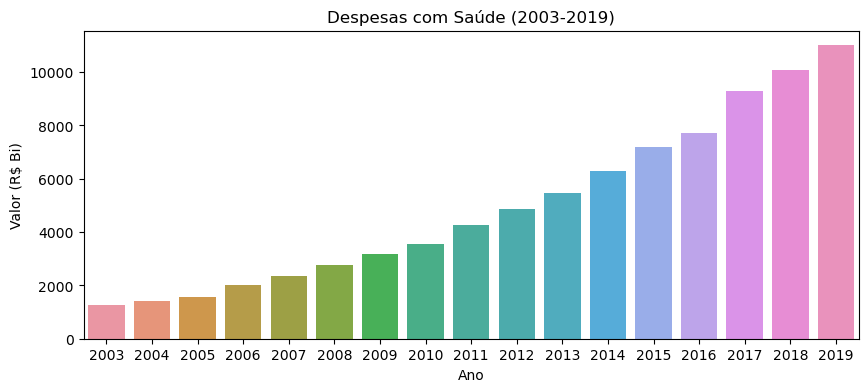

In [90]:
fig, ax = plt.subplots(figsize=(10,4))
sns.barplot(data=df_tratado, x='ano_coleta', y='gasto_saude_BI')
#df_tratado.plot(x='ano_coleta', y='gasto_saude_BI', kind='bar')
plt.title('Despesas com Saúde (2003-2019)')
plt.xlabel('Ano')
plt.ylabel('Valor (R$ Bi)')
plt.show()

### Resposta: 2019 foi o ano com o maior volume de gastos em saúde dentro do período analisado.

# 3. Qual ano teve as maiores despesas com educação?


In [105]:
df_tratado.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,despesa_nac_bruta_%pib,pib_moeda_local,gasto_saude_BI,gasto_educacao_BI
0,2003,20.8507,25.4379,24.9801,5.1691,16.877,21.7389,2.741964e+09,2.7096,0.1809,51.8242,1.4884,2.9325,111.7326,1131782000000,1264.569455,235.984469
1,2004,23.4095,27.5270,26.6682,5.3449,16.877,21.7389,2.882726e+09,2.7208,2.2832,55.5177,1.4160,5.1043,110.3472,1274329000000,1406.186370,298.314047
2,2005,22.5437,30.9610,27.4693,5.3144,16.877,21.7389,2.663224e+09,2.7392,3.0450,58.2378,1.4827,5.9067,110.4293,1415725000000,1563.375207,319.156797
3,2006,21.6778,40.9383,25.0814,5.8734,16.877,21.7389,2.764089e+09,2.7579,3.5762,71.9413,1.4585,6.4725,109.2124,1862041000000,2033.579665,403.649524
4,2007,25.8529,50.3219,23.9500,5.9971,16.877,21.7389,2.968119e+09,2.7686,3.9331,77.7897,1.5564,6.8507,109.9413,2151349000000,2365.221058,556.186106


In [120]:
df_tratado['gasto_nac_bruto'] = df_tratado['despesa_nac_bruta_%pib'] / 100 * df_tratado['pib_moeda_local']
df_tratado.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,despesa_nac_bruta_%pib,pib_moeda_local,gasto_saude_BI,gasto_educacao_BI,gasto_nac_bruto
0,2003,20.8507,25.4379,24.9801,5.1691,16.877,21.7389,2.741964e+09,2.7096,0.1809,51.8242,1.4884,2.9325,111.7326,1131782000000,1264.569455,315.890714,1.264569e+12
1,2004,23.4095,27.5270,26.6682,5.3449,16.877,21.7389,2.882726e+09,2.7208,2.2832,55.5177,1.4160,5.1043,110.3472,1274329000000,1406.186370,375.004594,1.406186e+12
2,2005,22.5437,30.9610,27.4693,5.3144,16.877,21.7389,2.663224e+09,2.7392,3.0450,58.2378,1.4827,5.9067,110.4293,1415725000000,1563.375207,429.448226,1.563375e+12
3,2006,21.6778,40.9383,25.0814,5.8734,16.877,21.7389,2.764089e+09,2.7579,3.5762,71.9413,1.4585,6.4725,109.2124,1862041000000,2033.579665,510.050250,2.033580e+12
4,2007,25.8529,50.3219,23.9500,5.9971,16.877,21.7389,2.968119e+09,2.7686,3.9331,77.7897,1.5564,6.8507,109.9413,2151349000000,2365.221058,566.470443,2.365221e+12


In [121]:
df_tratado['gasto_educacao_BI'] = (df_tratado['gasto_nac_bruto'] * (df_tratado['despesas_educ_total'] / 100))

In [122]:
df_tratado.head(20)

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,despesa_nac_bruta_%pib,pib_moeda_local,gasto_saude_BI,gasto_educacao_BI,gasto_nac_bruto
0,2003,20.8507,25.4379,24.9801,5.1691,16.8770,21.7389,2.741964e+09,2.7096,0.1809,51.8242,1.4884,2.9325,111.7326,1131782000000,1264.569455,3.158907e+11,1.264569e+12
1,2004,23.4095,27.5270,26.6682,5.3449,16.8770,21.7389,2.882726e+09,2.7208,2.2832,55.5177,1.4160,5.1043,110.3472,1274329000000,1406.186370,3.750046e+11,1.406186e+12
2,2005,22.5437,30.9610,27.4693,5.3144,16.8770,21.7389,2.663224e+09,2.7392,3.0450,58.2378,1.4827,5.9067,110.4293,1415725000000,1563.375207,4.294482e+11,1.563375e+12
3,2006,21.6778,40.9383,25.0814,5.8734,16.8770,21.7389,2.764089e+09,2.7579,3.5762,71.9413,1.4585,6.4725,109.2124,1862041000000,2033.579665,5.100503e+11,2.033580e+12
4,2007,25.8529,50.3219,23.9500,5.9971,16.8770,21.7389,2.968119e+09,2.7686,3.9331,77.7897,1.5564,6.8507,109.9413,2151349000000,2365.221058,5.664704e+11,2.365221e+12
5,2008,30.0280,55.4711,22.8187,6.0499,16.8770,21.7389,3.050475e+09,2.7673,-2.5034,89.5758,1.6380,0.2323,110.6143,2483058000000,2746.617225,6.267423e+11,2.746617e+12
6,2009,34.2031,55.4607,21.6873,6.0278,16.8770,21.7389,3.156096e+09,2.7508,0.5039,100.0000,1.6806,3.3069,110.7984,2863688000000,3172.920485,6.881208e+11,3.172920e+12
7,2010,38.3781,59.1698,20.5560,6.1168,16.8770,21.7389,3.237614e+09,2.7226,5.4941,102.0917,1.7715,8.4057,112.1647,3169335000000,3554.875095,7.307401e+11,3.554875e+12
8,2011,42.5532,57.3874,19.2528,5.8117,16.8770,21.7389,3.388428e+09,2.6937,3.2881,113.1114,1.7938,6.1083,114.5232,3725918000000,4267.040523,8.215248e+11,4.267041e+12
9,2012,41.7632,64.8394,19.9239,5.6137,16.8770,21.7389,3.585785e+09,2.6627,1.8157,123.7210,1.8193,4.5632,114.0667,4261370003300,4860.804138,9.684618e+11,4.860804e+12


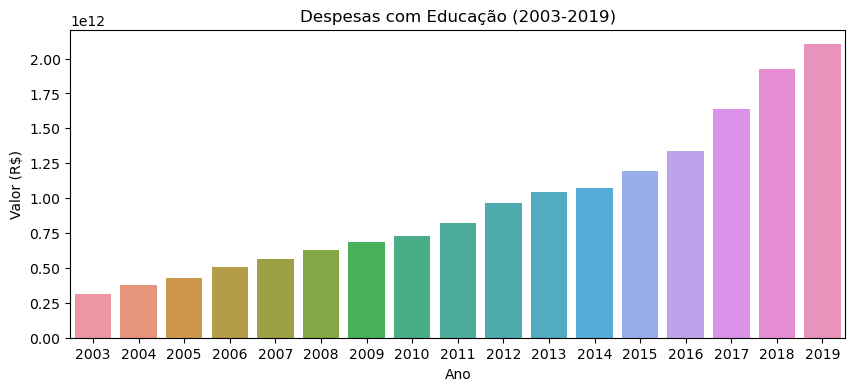

In [125]:
fig, ax = plt.subplots(figsize=(10,4))
sns.barplot(data=df_tratado, x='ano_coleta', y='gasto_educacao_BI')
plt.title('Despesas com Educação (2003-2019)')
plt.xlabel('Ano')
plt.ylabel('Valor (R$)')
plt.show()

### Resposta: Em 2019 ocorreu o maior gasto com educação no período em análise.